In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [3]:
df = read_csv('international-airline-passengers.csv',
             usecols = [1], skipfooter=3)

/Users/asingla/anaconda2/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [16]:
df.describe()
values = df.values.astype('float32')

In [17]:
train_size = int(len(values) * 0.67)
test_size = len(values) - train_size
train = values[0: train_size]
test = values[train_size:]

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)
train.shape

(96, 1)

In [45]:
def create_dataset(data, look_back):
    dataX, dataY = [],[]
    for i in range(len(data) - look_back):
        x = data[i:i + look_back, 0]
        y = data[i + look_back, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [74]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(84, 1, 12)

In [75]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
0s - loss: 0.0297
Epoch 2/100
0s - loss: 0.0165
Epoch 3/100
0s - loss: 0.0143
Epoch 4/100
0s - loss: 0.0127
Epoch 5/100
0s - loss: 0.0117
Epoch 6/100
0s - loss: 0.0107
Epoch 7/100
0s - loss: 0.0099
Epoch 8/100
0s - loss: 0.0095
Epoch 9/100
0s - loss: 0.0087
Epoch 10/100
0s - loss: 0.0082
Epoch 11/100
0s - loss: 0.0076
Epoch 12/100
0s - loss: 0.0070
Epoch 13/100
0s - loss: 0.0061
Epoch 14/100
0s - loss: 0.0060
Epoch 15/100
0s - loss: 0.0060
Epoch 16/100
0s - loss: 0.0052
Epoch 17/100
0s - loss: 0.0047
Epoch 18/100
0s - loss: 0.0043
Epoch 19/100
0s - loss: 0.0039
Epoch 20/100
0s - loss: 0.0038
Epoch 21/100
0s - loss: 0.0033
Epoch 22/100
0s - loss: 0.0034
Epoch 23/100
0s - loss: 0.0031
Epoch 24/100
0s - loss: 0.0030
Epoch 25/100
0s - loss: 0.0026
Epoch 26/100
0s - loss: 0.0027
Epoch 27/100
0s - loss: 0.0025
Epoch 28/100
0s - loss: 0.0025
Epoch 29/100
0s - loss: 0.0025
Epoch 30/100
0s - loss: 0.0024
Epoch 31/100
0s - loss: 0.0023
Epoch 32/100
0s - loss: 0.0025
Epoch 33/100
0s -

In [76]:
testPredict = model.predict(testX)
trainPredict = model.predict(trainX)
testPredict = scaler.inverse_transform(testPredict)
trainPredict = scaler.inverse_transform(trainPredict)
testTrue = scaler.inverse_transform([testY])
trainTrue = scaler.inverse_transform([trainY])

In [77]:
testTrue.shape, testPredict.shape

((1, 36), (36, 1))

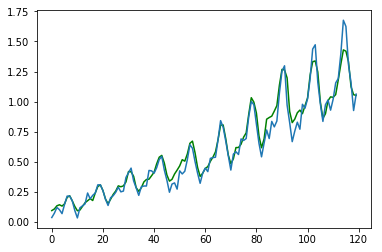

In [78]:
predicted = np.concatenate((trainPredict.ravel(),testPredict.ravel()))
trueValues = np.concatenate((trainTrue.ravel(),testTrue.ravel()))
plt.plot(predicted, c = 'g')
plt.plot(trueValues)
plt.show()